# <span style="color:red">TP 3 : Modèles probabilistes génératifs pour le Machine Learning</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from collections import Counter


from TP3_functions.load_ag_news import load_ag_news

## <span style="color:red">Exercice 1</span>

1. Les données

In [2]:
########################################
#### Import du dataset AG News ####
########################################

def charger():
    path = "TP3_functions/" 
    train_set, test_set = load_ag_news(path)
    return train_set, test_set

In [3]:
train_set, test_set = charger()

In [4]:
len(train_set), len(test_set)

(120000, 7600)

2. Développer un Naive Bayes !

- Estimation des paramètres sur le corpus d’entraînement par maximum de vraisemblance, donc en comptant les di érents patterns. Vous a cherai clairement les valeurs du paramètre   et Åi Ë {0, 1, 2, 3}, bi(¨London¨).

    On à pour formule :
    
## $\pi = \frac{N_{i}}{N}$	

In [5]:
def param_pi(i):
    count = 0
    for j in range(len(train_set)):
        if train_set[j][0] == i:
            count = count + 1
    return  count / len(train_set)           


In [6]:
print("pi(1) = {}".format(param_pi(i = 1)))

pi(1) = 0.25


    On à pour formule :

## $b_{i}(y_{t}) = \frac{N_{i,y_{t}}}{\sum_{y_{t}} N_{i,y_{t}}} $

In [7]:
##########################################################
### On crée le param le dictionnaire du paramN_i_y(t): ###
##########################################################

b = {}

for label, text in train_set:
    if label not in b:
        b[label] = {}
    for word in text:
        if word in b[label]:
            b[label][word] = b[label][word] + 1
        else:
            b[label][word] = 1



In [8]:
def param_b(y_t):
    b

    classes = [0, 1, 2, 3]

    B = np.zeros((1, 4))
    for i in classes:
        if y_t in b[i]:
            B[0, i] = b[i][y_t] / sum(b[i].values())
        else:
            B[0, i] = 0
        
    return B

Création des dictionnaires ayant en valeur la liste des valeurs $b_{i}(y_{t})$ pour l'ensemble des elements de b 

In [9]:
# Liste des param_b pour la classe 0
B0 = dict.fromkeys(b[0])
for key in b[0].keys():
    B0[key] = b[0][key] / sum(b[0].values())

# Liste des param_b la classe 1
B1 = dict.fromkeys(b[1])
for key in b[1].keys():
    B1[key] = b[1][key] / sum(b[1].values())

# Liste des param_b la classe 2
B2 = dict.fromkeys(b[2])
for key in b[2].keys():
    B2[key] = b[2][key] / sum(b[2].values())

# Liste des param_b la classe 3
B3 = dict.fromkeys(b[3])
for key in b[3].keys():
    B3[key] = b[3][key] / sum(b[3].values())

In [10]:
print("b1(¨London¨) = {}".format((param_b(y_t = 'London')[0,1])))

b1(¨London¨) = 0.00018036294574312617


* Coder un modèle Naive Bayes. 
    * La formule est :

##  $p(X, Y_{1}, ..., Y_{T}) =  \prod_{t=1}^{T} {p(Y_{t}| X)}$

Point de vue génératif :

## ￼$p(X = \lambda_{i} | y_{1:T} ) = \frac{\pi_{i} * \prod_{t=1}^{T} b_{i}(y_{t})}{\sum \pi(j) \prod_{t=1}^{T} b_{j}(y_{t})} = \frac{p(X = \lambda_{i}) * \prod_{t=1}^{T} p(y_{t}|X = \lambda_{i} )}{\sum{p(X = \lambda_{j}) * \prod_{t=1}^{T} p(y_{t}|X = \lambda_{j} )}}  $

Résoudre le problème du sur-apprentissage

## ￼$p(X = \lambda_{i} | y_{1:T} ) = \frac{\pi_{i} * \prod_{t=1}^{T} (b_{i}(y_{t}) + \epsilon)}{\sum \pi(j) \prod_{t=1}^{T} (b_{j}(y_{t}) + \epsilon)} = \frac{A}{sum(A)}$

In [11]:
phrase = ["Arsenal", "is", "a", "londonian", "team", "."]


In [12]:
def Naive_Bayes(phrase, epsilon, classes) :

    bayes_coeff = np.zeros((1,len(classes)))
    
    for i in classes:
        # initialisation avec la valeur pi
        A = param_pi(i)
        for mot in phrase:
            if mot in b[i]:
                A = A * (param_b(y_t = mot)[0,i] + epsilon)
            else:
                A = A * epsilon
        bayes_coeff[0, i] = A
    

    bayes_coeff = bayes_coeff / np.sum(bayes_coeff)

    return bayes_coeff     


In [13]:
p_X = Naive_Bayes(phrase = phrase, epsilon = 0.00001, classes = [0, 1, 2, 3])

Rappel des classes :
* World => classe 0
* Sport => classe 1
* Business => classe 2
* Sci/Tech => classe 3

In [14]:
print("La prédiction de la phrase est : p(X = Sport (",np.argmax(p_X),") | y1:6) = ", np.max(p_X), )


La prédiction de la phrase est : p(X = Sport ( 1 ) | y1:6) =  0.9924989725858532


- Le produit des log est égal aux log de leur somme

$\log(x * y) = \log(x) + \log(y)$

- Version log du Naive_Bayes :
    - Pour eviter les erreurs d'underflows.  

In [15]:
def Naive_Bayes_log(phrase, epsilon, classes) :

    bayes_coeff = np.zeros((1,len(classes)))
    
    for i in classes:
        # initialisation avec la valeur pi
        if i == 0:
            B = B0
        elif i == 1:
            B = B1
        elif i == 2:
            B = B2
        elif i == 3:
            B = B3

            
        A = np.log(param_pi(i))
        for mot in phrase:
            if mot in b[i]:
                A = A + np.log((B[mot] + epsilon))          # (param_b(y_t = mot)[0,i]
            else:
                A = A + np.log(epsilon)
        bayes_coeff[0, i] = A
    

    return bayes_coeff     


In [16]:
a = Naive_Bayes_log(phrase = phrase, epsilon = 0.00005, classes = [0, 1, 2, 3])

In [17]:
print(a)

[[-42.76048522 -37.89785476 -43.50953671 -42.0190564 ]]


### Prédiction sur l’ensemble du corpus de test

In [18]:
def test_Bayes_model(test_set, epsilon, classes):
    
    j = 0
    classif = np.zeros((len(test_set), 1))
    for test in test_set:
        print('"\rstep : {}'.format(j) , end="")
        proba = Naive_Bayes_log(test[1], epsilon, classes)
        va_max = np.argmax(proba)
        if va_max == test[0]:
            classif[j] = 1
        else:
            classif[j] = 0
        j = j + 1
            
    error = sum(classif) / len(classif)

    return error


-  Prédiction sur l’ensemble du corpus de test, vous indiquerai le pourcentage de textes correctement
prédits. Vous ferez ces prédictions trois fois en prenant epsilon dans {10−10, 10−5, 1}.
Commentez les résultats en fonction des di érentes valeurs.

Old method (Calcul iteratif de param_b à chaque iteration) (sans les liste B0, B1, B2, B3)
* time = 52m 42,2s
    * step : 7599
    * array([0.87921053])


New Methode (Calcul du param B pour chaque element de train test en amont de la fonction test Bayes) (avec les liste B0, B1, B2, B3)
* time = 8 mn 34,7 sec
    * step = 7599
    * array([0.87921053])

In [19]:
test_Bayes_model(test_set = test_set, epsilon = 10**(-10), classes = [0, 1, 2, 3])

step : 7599

array([0.90105263])

In [20]:
test_Bayes_model(test_set = test_set, epsilon = 10**(-5), classes = [0, 1, 2, 3])

step : 7599

array([0.89407895])

In [21]:
test_Bayes_model(test_set = test_set, epsilon = 1, classes = [0, 1, 2, 3])

step : 7599

array([0.49092105])

Discussion :



## <span style="color:red">Exercice 2</span>

# Étiquetage morpho-syntaxique avec une chaîne de Markov cachée

1. Introduction

In [22]:
from TP3_functions.load_conll2000 import load_conll2000

path = "TP3_functions/"
train_set, test_set = load_conll2000(path)

In [23]:
len(train_set)

8936

## $pi (i) = \frac{N_{i}}{N} $

In [24]:
def pi_hmm(train_set):
    pi_hmm = {} 
    nombre = 0

    for i in range(len(train_set)):
        for label, value in train_set[i]:
            if label not in pi_hmm:
                pi_hmm[label] = 1 
                nombre += 1
            else:
                pi_hmm[label] = pi_hmm[label] + 1 
                nombre += 1           

    for key in pi_hmm.keys():
        pi_hmm[key] = pi_hmm[key] / nombre    

    return pi_hmm

In [25]:
pi_hmm = pi_hmm(train_set)

Est attendu en résultat : $\pi_{ADJ}$ = 0.067596480373

In [26]:
pi_hmm['ADJ']

0.06759648037331091

Calculer $a_{i}(j)$ tel que :
## $a_{i}(j) = \frac{N_{i,j}}{\sum_{j'} N_{i,j'}} $

In [27]:
def a_hmm(pi_hmm, train_set):
    
    a = {}

    for key in pi_hmm.keys():
        a[key] = {}
        for name in pi_hmm.keys():
            a[key][name] = 0

    for i in range(len(train_set)):
        D = []
        for label, value in train_set[i]:
            D.append(label)
        for j in range(len(D) - 1):
            a[D[j]][D[j+1]] += 1

    for clas in a.keys():
        somme = sum(a[clas].values())
        for clef in a[clas]:
            a[clas][clef] = a[clas][clef] / somme

    return a

    

In [28]:
a_hmm = a_hmm(pi_hmm, train_set)

On estime $a_{'NUM'}('NOUN')$ d'apres l'énoncé la valeur est de 0.34821321140

In [29]:
a_hmm['NUM']['NOUN']

0.34821321140656963

Calculer $b_{i}(y_{t})$ tel que : 

## $b_{i}(y_{t}) = \frac{N_{i,y_{t}}}{\sum_{y_{t'}} N_{i,y_{t'}}} $

In [30]:
def b_hmm(pi_hmm, train_set):
    b_hmm = {}

    for key in pi_hmm.keys():
        b_hmm[key] = {}
    for i in range(len(train_set)):
        for label, mot in train_set[i]:
            if mot not in (b_hmm[label]) :
                b_hmm[label][mot] = 1
            else:
                b_hmm[label][mot] += 1


    for clas in b_hmm.keys():
            somme = sum(b_hmm[clas].values())
            for clef in b_hmm[clas]:
                b_hmm[clas][clef] = b_hmm[clas][clef] / somme
    
    return b_hmm

In [31]:
b_hmm = b_hmm(pi_hmm, train_set)

On estime $b_{'PUNCT'}('.')$ d'apres l'énoncé la valeur est de 0.3601948561284

In [32]:
b_hmm['PUNCT']['.']

0.36019485612847296

    Coder l’algorithme Foward-Backward.

In [33]:
def forward_backward(phrase,):
    alpha = {}

    for i in phrase :
        alpha[i] = {}

    classes = []
    for t in train_set: 
        for i in t :
            if not(i[0] in classes):
                classes.append(i[0])

    

In [34]:
phrase2 =["I", "am", "a", "student", "in", "a", "French", "school","."]

In [35]:
epsilon = 10**(-5)

def alpha(phrase2, epsilon):
    alpha = {}

    for i in phrase2 :
        alpha[i] = {}
        for j in a_hmm.keys():
            alpha[i][j] = 0

    # Initialisation 
    for key in a_hmm.keys():
        alpha[phrase2[0]][key] = pi_hmm[key] * (b_hmm[key].get(phrase2[0], 0) + epsilon)
    norma = np.sum(list(alpha[phrase2[0]].values()))
    alpha[phrase2[0]] = {key:value / norma for (key,value) in alpha[phrase2[0]].items()}

    for i in range(len(phrase2)-1):
        for key in a_hmm.keys():
            somme_alpha = 0
            for clef in a_hmm.keys():
                somme_alpha =  somme_alpha + alpha[phrase2[i]][clef]*a_hmm[clef][key]
            
            alpha[phrase2[i+1]][key] = (b_hmm[key].get(phrase2[i+1], 0) + epsilon) * somme_alpha
            
        norma = np.sum(list(alpha[phrase2[i+1]].values()))
        alpha[phrase2[i+1]] = {key:value / norma for (key,value) in alpha[phrase2[i+1]].items()}

    return alpha




In [36]:
def beta(phrase2, epsilon):
    beta = {}

    for i in phrase2 :
        beta[i] = {}
        for j in a_hmm.keys():
            beta[i][j] = 0 

    for key in a_hmm.keys():
        beta[phrase2[-1]][key] = 1 / 15
    norma = np.sum(list(beta[phrase2[-1]].values()))
    beta[phrase2[-1]] = {key:value / norma for (key,value) in beta[phrase2[-1]].items()}

    for i in range(len(phrase2)-1, 0,  -1):
        for key in a_hmm.keys():
            somme_beta = 0
            for clef in a_hmm.keys():
                somme_beta =  somme_beta + beta[phrase2[i]][clef]*a_hmm[key][clef]*(b_hmm[clef].get(phrase2[i], 0) + epsilon)
            
            beta[phrase2[i-1]][key] = somme_beta
            
        norma = np.sum(list(beta[phrase2[i-1]].values()))
        beta[phrase2[i-1]] = {key:value / norma for (key,value) in beta[phrase2[i-1]].items()}

    
    return beta



In [37]:
alpha_p2 = alpha(phrase2, epsilon)
beta_p2 = beta(phrase2, epsilon)

In [38]:
gamma = {}

for i in phrase2 :
    gamma[i] = {}
    for j in a_hmm.keys():
        gamma[i][j] = 0 

for i in range(len(phrase2)):
    for key in a_hmm.keys():
        gamma[phrase2[i]][key] = alpha_p2[phrase2[i]][key] * beta_p2[phrase2[i]][key]

    Afficher les labels prédits sur la phrase: ["I", "am", "a", "student", "in", "a", "French", "school","."]

In [39]:
prediction = []
for i in range(len(phrase2)):
    prediction.append(max(gamma[phrase2[i]], key=gamma[phrase2[i]].get))

In [40]:
print(phrase2)
print(prediction)

['I', 'am', 'a', 'student', 'in', 'a', 'French', 'school', '.']
['PRON', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT']


Appliquer la chaîne de Markov cachée avec Forward-Backward sur tout le corpus de
test, et donnez le pourcentage de mots bien labélisés, avec $\epsilon = 10^{−5}$. Vous devriez trouver
un score  nal de 93.94854043.

In [41]:
####################################################################
######### Chaine de Markov caché appliqué sur le test _set #########
####################################################################

count = []
epsilon = 10**-5

for i in range(0, len(test_set), 1):
    for label, mot2 in test_set[i]:
        mot = [mot2]
    
        alpha_t = alpha(phrase2 = mot, epsilon = epsilon)
        beta_t = beta(phrase2 = mot, epsilon = epsilon)
        
        gamma_t = {}

        for k in mot :
            gamma_t[k] = {}
            for l in a_hmm.keys():
                gamma_t[k][l] = 0 

        for i in range(len(mot)):
            for key in a_hmm.keys():
                gamma_t[mot[0]][key] = alpha_t[mot[0]][key] * beta_t[mot[0]][key]

        pred = max(gamma_t[mot[0]], key=gamma_t[mot[0]].get)

        if pred == label:
            count.append(1)
        else:
            count.append(0)
        


print((sum(count) / len(count)) * 100)

92.71376406273086


## <span style="color:red">Exercice 3</span>

## Filtrage de Kalman

### 3.1 Introduction

Vous disposez d’une série temporelle y1:T de taille T = 10000. Vous pouvez charger les signaux
ainsi:

In [42]:
path = "TP3_functions/"

# Signal d'origine
X = np.loadtxt(path + "signal_X.txt")
# Version bruité
Y = np.loadtxt(path + "signal_Y.txt")

In [43]:
import  matplotlib.pylab as plt

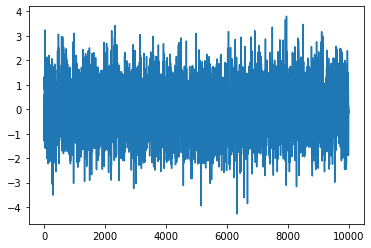

In [44]:
plt.plot(X)

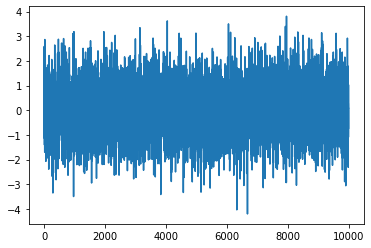

In [45]:
plt.plot(Y)

**Estimer la valeur des paramètres a et b de manière non supervisée.** 

Dans le cas non suppervisé les valeur de a et b sont =

$a*b^{2} = cov(y_{t}, y_{t+1}) = cov1$

$a^{2}*b^{2} = cov(y_{t}, y_{t+2}) = cov2$

    i.e.

***$a = cov2 / cov1$***

    &

***$b = cov1 / cov2^{1/2}$***

In [46]:
def estim_param_Y(Y):

    cov1 = 0
    prev_y = Y[0]
    for y in Y[1:]:
        cov1 +=  prev_y * y
        prev_y = y
    
    cov1 = cov1 / (len(Y) - 1) 


    cov2 = 0
    prev_y = Y[0]
    for k in range (len(Y[1:])-2):
        cov2 += prev_y * Y[k+2]
        prev_y = Y[k+1]

    cov2 = cov2 / (len(Y) - 2)

    print(cov1, cov2)

    a = cov2 / cov1
    b = cov1 / np.sqrt(cov2)

    return a, b


In [47]:
a, b = estim_param_Y(Y)

a, b

0.4684381378248499 0.2795609305487001


(0.5967937022523743, 0.8859597810948914)

Coder un filtre de Kalman afin de restaurer le signal $\overset{chap}{x}_{1 : T}$ à partir de $y_{1 : T}$.

In [48]:
def filtre_kalman(Y, a, b):
    y_t1 = Y[0]
    x_tt = y_t1 * b
    sigma_tt = 1 - b**2
    X_tt = [x_tt]

    for i in range (len(Y) - 1):
        # step 1 : Prediction
        y_t1 = Y[i+1]
        x_t1t = a * x_tt
        sigma_t1t = 1 - a**2 + a**2 * sigma_tt

        # step2 : Mise à jour
        y_tilde = y_t1 - b * x_t1t
        S = b**2 * sigma_t1t + 1 - b**2
        K = (b / S) * sigma_t1t
        x_t1t1 = x_t1t + K * y_tilde # A retenir pour l'estimation
        sigma_t1t1 = (1 - b*K) * sigma_t1t 

        # glissement des variables
        x_tt = x_t1t1
        sigma_tt = sigma_t1t1

        # L'estimation
        X_tt.append(x_tt)

    return X_tt

**Évaluez le filtre en calculant l’erreur quadratique moyenne entre $\overset{chap}{x}$ et le signal
restauré x. Calculez également l’erreur quadratique moyenne entre x et y, que pouvez-vous
conclure ?**

**$EQM(x_{1:T}, xchap_{1:T}) = \frac{1}{T} * \sum_{t=1}^{T}(x_{t} - xchap_{t})^{2} $**

In [49]:
def EQM(X, Y):
    eqm = 0
    for i in range(len(X)):
        eqm += (X[i] - Y[i])**2
    eqm = eqm / len(X)
    
    return eqm


**Afficher sur un graphique les 100 premières itérations du signal restauré et le signal
d’origine.**

In [50]:
X_tt = filtre_kalman(Y, a, b)

In [51]:
print('len X_tt : {} ; len X : {}'.format(len(X_tt), len(X)))

len X_tt : 10000 ; len X : 10000


In [52]:
print("l erreur quadratique moyenne (entre X_tt & X) = ", EQM(X_tt, X))

l erreur quadratique moyenne (entre X_tt & X) =  0.17449736949466563


In [53]:
print("l erreur quadratique moyenne (entre X & Y) = ", EQM(X, Y))

l erreur quadratique moyenne (entre X & Y) =  0.20225719834189304


Le filtre de Kalman a donc bien corrigé le signal, l'EQM est plus faible que sans.

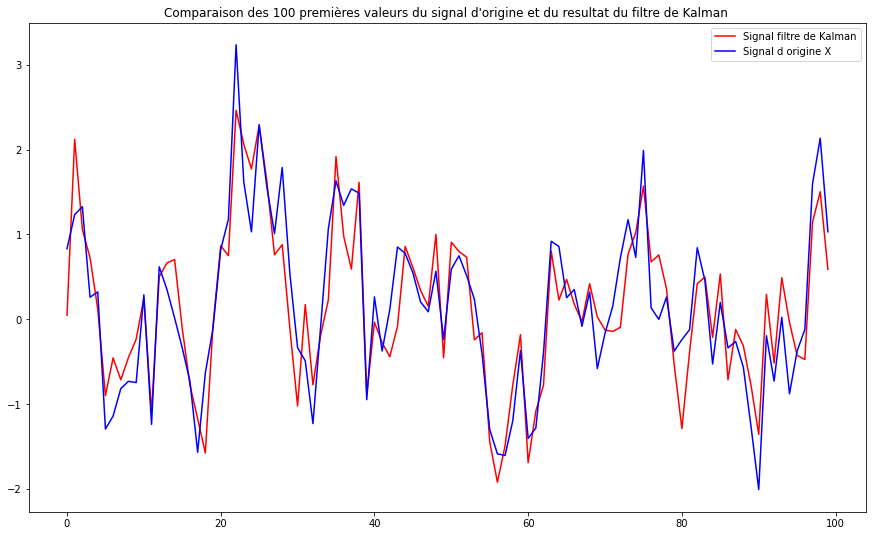

In [54]:
fig = plt.figure(1, figsize=(15, 9))

plt.plot(X_tt[:100], color = 'red', label = 'Signal filtre de Kalman')
plt.plot(X[:100], color = 'blue', label = 'Signal d origine X')
plt.legend()
plt.title("Comparaison des 100 premières valeurs du signal d'origine et du resultat du filtre de Kalman ")
plt.show()